In [1]:
import pandas as pd
import numpy as np
import altair as alt


In [2]:
df = pd.read_csv("Monthly.csv") 
df.rename({'JANUARY DEPARTURE':'JANUARY', 'FEBRUARY DEPARTURE':"FEBRUARY",'MARCH DEPARTURE':'MARCH', 'APRIL DEPARTURE':'APRIL', 'MAY DEPARTURE':'MAY', 'JUNE DEPARTURE':'JUNE','JULY DEPARTURE':"JULY", 
 'AUGUST DEPARTURE':'AUGUST', 'SEPTEMBER DEPARTURE':"SEPTEMBER",'OCTOBER DEPARTURE':'OCTOBER', 'NOVEMBER DEPARTURE':'NOVEMBER'}, axis=0, inplace=True)
df

,COUNTRIES,JANUARY DEPARTURE,FEBRUARY DEPARTURE,MARCH DEPARTURE,APRIL DEPARTURE,MAY DEPARTURE,JUNE DEPARTURE,JULY DEPARTURE,AUGUST DEPARTURE,SEPTEMBER DEPARTURE,OCTOBER DEPARTURE,NOVEMBER DEPARTURE
0,IVORIANS,1634,1662,3559,1517,1673,1727,1954,2351,2201,1677,2172
1,BURKINESE,1780,1693,3482,1394,1653,1494,1482,2750,1714,1416,1404
2,NIGERIANS,7910,6490,13558,9320,9421,8867,8969,9554,8533,7583,8051
3,LIBERRIANS,757,734,1498,1215,1414,1459,1520,1368,1402,1230,1604
4,SOUTH AFRICANS,1415,1563,1767,1622,1760,1996,1984,1898,1877,2104,1993
5,TOGOLESE,873,702,1581,906,856,888,1081,1230,1285,1045,1074
6,FRENCH,905,1117,1126,1350,1064,1145,1177,1246,1074,1187,1201
7,GERMANS,1548,1298,1555,1704,1253,1184,1614,2454,1968,1763,1476
8,DUTCH,1250,903,1049,1079,1083,1062,1440,2028,1056,1213,1217
9,BRITISH,4798,3257,3888,1854,3452,3649,4463,6556,4887,4226,4407


In [3]:
import altair as alt
from vega_datasets import data

source = data.barley()
alt.Chart(source).mark_bar().encode(
    x='variety',
    y='sum(yield)',
    color='site'
)
source

,yield,variety,year,site
0,27.00000,Manchuria,1931,University Farm
1,48.86667,Manchuria,1931,Waseca
2,27.43334,Manchuria,1931,Morris
3,39.93333,Manchuria,1931,Crookston
4,32.96667,Manchuria,1931,Grand Rapids
...,...,...,...,...
115,58.16667,Wisconsin No. 38,1932,Waseca
116,47.16667,Wisconsin No. 38,1932,Morris
117,35.90000,Wisconsin No. 38,1932,Crookston
118,20.66667,Wisconsin No. 38,1932,Grand Rapids


alt.Chart(df).mark_rect().encode(
    x = alt.X('APRIL DEPARTURE:O', bin=True),
    y = alt.Y('count(APRIL DEPARTURE)'),
    color=alt.Color('COUNTRIES:N')
)

own = pd.DataFrame({'countries':df['COUNTRIES'], 'April':df['APRIL DEPARTURE']})
print(own.head(2))

months = ['JANUARY DEPARTURE', 'FEBRUARY DEPARTURE','MARCH DEPARTURE', 'APRIL DEPARTURE', 'MAY DEPARTURE', 'JUNE DEPARTURE','JULY DEPARTURE', 'AUGUST DEPARTURE', 'SEPTEMBER DEPARTURE','OCTOBER DEPARTURE', 'NOVEMBER DEPARTURE']

alt.Chart(df).mark_bar().encode(
    x = 'COUNTRIES',
    y = 'sum(APRIL DEPARTURE)',
    color = alt.Color('COUNTRIES')
).properties(
    width=200,
    height=200).repeat(
    row=months,
    column=months[::2]
    #column=months
)


In [4]:
'IVORIANS','BURKINESE','NIGERIANS','LIBERRIANS','SOUTH AFRICANS','TOGOLESE','FRENCH','GERMANS','DUTCH','BRITISH','AMERICANS','CANADIANS','CHINESE','INDIANS','LEBANESE','AUSTRIALIANS','OTHER NATIONALS'


('IVORIANS',
 'BURKINESE',
 'NIGERIANS',
 'LIBERRIANS',
 'SOUTH AFRICANS',
 'TOGOLESE',
 'FRENCH',
 'GERMANS',
 'DUTCH',
 'BRITISH',
 'AMERICANS',
 'CANADIANS',
 'CHINESE',
 'INDIANS',
 'LEBANESE',
 'AUSTRIALIANS',
 'OTHER NATIONALS')

months = ['JANUARY DEPARTURE', 'FEBRUARY DEPARTURE','MARCH DEPARTURE', 'APRIL DEPARTURE', 'MAY DEPARTURE', 'JUNE DEPARTURE','JULY DEPARTURE', 'AUGUST DEPARTURE', 'SEPTEMBER DEPARTURE','OCTOBER DEPARTURE', 'NOVEMBER DEPARTURE']

alt.Chart(df).mark_bar().encode(
    alt.X(alt.repeat("column"), type='ordinal'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='species'
).properties(
    width=200,
    height=200
).repeat(
    row=months
).interactive()

In [5]:

month1 = ['JANUARY DEPARTURE', 'FEBRUARY DEPARTURE','MARCH DEPARTURE', 'APRIL DEPARTURE']
a = alt.Chart(df).mark_bar().encode(
    alt.X(alt.repeat("column"), type='ordinal',title='COUNTRIES'),
    alt.Y(alt.repeat("column"), type='quantitative'),
    color=alt.Color('COUNTRIES')).properties(
    width=270,
    height=270).repeat(
    #row=months[:-8],
    column=month1[:]
).interactive()

month2 = ['MAY DEPARTURE', 'JUNE DEPARTURE','JULY DEPARTURE', 'AUGUST DEPARTURE']
b = alt.Chart(df).mark_bar().encode(
    alt.X(alt.repeat("column"), type='ordinal',title='COUNTRIES'),
    alt.Y(alt.repeat("column"), type='quantitative'),
    color=alt.Color('COUNTRIES')).properties(
    width=270,
    height=270).repeat(
    #row=months[:-8],
    column=month2[:]
    
).interactive().properties()


month3 = ['SEPTEMBER DEPARTURE','OCTOBER DEPARTURE', 'NOVEMBER DEPARTURE']
c = alt.Chart(df).mark_bar().encode(
    alt.X(alt.repeat("column"), type='ordinal',title='COUNTRIES'),
    alt.Y(alt.repeat("column"), type='quantitative'),
    color=alt.Color('COUNTRIES')).properties(
    width=270,
    height=270).repeat(
    #row=months[:-8],
    column=month3[:]).interactive()
a & b & c

chart.configure_header(
    titleColor='green',
    titleFontSize=14,
    labelColor='red',
    labelFontSize=14
)

NameError: name 'chart' is not defined

In [6]:
import altair as alt
from vega_datasets import data

source = data.seattle_weather()

alt.Chart(source).mark_bar(
).encode(
    x='month(date):O',
    y='count():Q',
    color='weather:N'
)
source

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [7]:
source.head(2)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain


In [8]:
reset = df.T.reset_index()
reset.to_excel("trans.xlsx")
df1 = pd.read_csv("trans.csv")
df1.head(3)

,MONTHS,IVORIANS,BURKINESE,NIGERIANS,LIBERRIANS,SOUTH AFRICANS,TOGOLESE,FRENCH,GERMANS,DUTCH,BRITISH,AMERICANS,CANADIANS,CHINESE,INDIANS,LEBANESE,AUSTRIALIANS,OTHER NATIONALS
0,JANUARY DEPARTURE,1634,1780,7910,757,1415,873,905,1548,1250,4798,4987,1074,1539,1465,531,428,10364
1,FEBRUARY DEPARTURE,1662,1693,6490,734,1563,702,1117,1298,903,3257,3848,937,1987,1525,562,449,9920
2,MARCH DEPARTURE,3559,3482,13558,1498,1767,1581,1126,1555,1049,3888,4956,1048,1057,1710,622,435,185


alt.Chart(df1).mark_bar(
).encode(
    x='MONTHS:O',
    y='count(df1.value):Q',
    color='MONTHS:N'
    
)

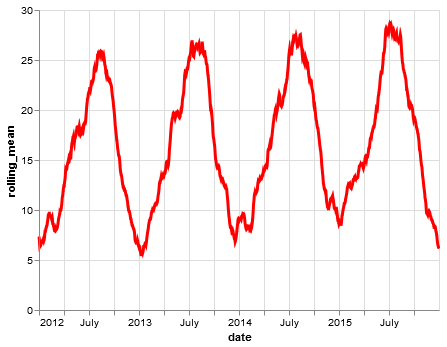

In [9]:
import altair as alt
from vega_datasets import data

source = data.seattle_weather()

line = alt.Chart(source).mark_line(
    color='red',
    size=3
).transform_window(
    rolling_mean='mean(temp_max)',
    frame=[-15, 15]
).encode(
    x='date:T',
    y='rolling_mean:Q'
)

points = alt.Chart(source).mark_point().encode(
    x='date:T',
    y=alt.Y('temp_max:Q',
            axis=alt.Axis(title='Max Temp'))
)

points + line

line

In [ ]:
#df1.head(2)

In [10]:
sum = pd.DataFrame(df1.sum(axis=0)).drop(['MONTHS'])
sum.reset_index(inplace=True)
sum.columns = ['MONTHS', 'TOTAL_DEPARTURES']
sum.head(5)

,MONTHS,TOTAL_DEPARTURES
0,IVORIANS,22127
1,BURKINESE,20262
2,NIGERIANS,98256
3,LIBERRIANS,14201
4,SOUTH AFRICANS,19979


In [11]:
df1.T.reset_index(inplace=False)
#del df1['MONTHS']
df1

,MONTHS,IVORIANS,BURKINESE,NIGERIANS,LIBERRIANS,SOUTH AFRICANS,TOGOLESE,FRENCH,GERMANS,DUTCH,BRITISH,AMERICANS,CANADIANS,CHINESE,INDIANS,LEBANESE,AUSTRIALIANS,OTHER NATIONALS
0,JANUARY DEPARTURE,1634,1780,7910,757,1415,873,905,1548,1250,4798,4987,1074,1539,1465,531,428,10364
1,FEBRUARY DEPARTURE,1662,1693,6490,734,1563,702,1117,1298,903,3257,3848,937,1987,1525,562,449,9920
2,MARCH DEPARTURE,3559,3482,13558,1498,1767,1581,1126,1555,1049,3888,4956,1048,1057,1710,622,435,185
3,APRIL DEPARTURE,1517,1394,9320,1215,1622,906,1350,1704,1079,1854,2118,408,1388,1839,766,139,19203
4,MAY DEPARTURE,1673,1653,9421,1414,1760,856,1064,1253,1083,3452,6113,1255,1397,1883,614,430,12232
5,JUNE DEPARTURE,1727,1494,8867,1459,1996,888,1145,1184,1062,3649,6614,1068,1479,2044,956,444,12628
6,JULY DEPARTURE,1954,1482,8969,1520,1984,1081,1177,1614,1440,4463,7590,1085,1666,2204,1137,456,13097
7,AUGUST DEPARTURE,2351,2750,9554,1368,1898,1230,1246,2454,2028,6556,8826,997,1540,1764,749,380,13876
8,SEPTEMBER DEPARTURE,2201,1714,8533,1402,1877,1285,1074,1968,1056,4887,6314,907,1620,1739,681,419,12855
9,OCTOBER DEPARTURE,1677,1416,7583,1230,2104,1045,1187,1763,1213,4226,5590,918,1232,1874,603,475,12216


In [12]:
import altair as alt
from vega_datasets import data

source = data.seattle_weather()

line = alt.Chart(source).mark_line(
    color='red',
    size=3
).transform_window(
    rolling_mean='mean(temp_max)',
    frame=[-15, 15]
).encode(
    x='date:T',
    y='rolling_mean:Q'
)

points = alt.Chart(source).mark_point().encode(
    x='date:T',
    y=alt.Y('temp_max:Q',
            axis=alt.Axis(title='Max Temp'))
)

points + line

source.head(2)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain


In [428]:
#exported the file to excel and transformed it for analysis
trans = pd.read_csv("transformed.csv")
trans

,MONTHS,DEPARTURES,COUNTRIES,PERCENTAGE
0,JANUARY,1634,IVORIANS,3.78
1,JANUARY,1780,BURKINESE,4.11
2,JANUARY,7910,NIGERIANS,18.29
3,JANUARY,757,LIBERRIANS,1.75
4,JANUARY,1415,SOUTH AFRICANS,3.27
...,...,...,...,...
182,SEPTEMBER,1620,CHINESE,3.21
183,SEPTEMBER,1739,INDIANS,3.44
184,SEPTEMBER,681,LEBANESE,1.35
185,SEPTEMBER,419,AUSTRIALIANS,0.83


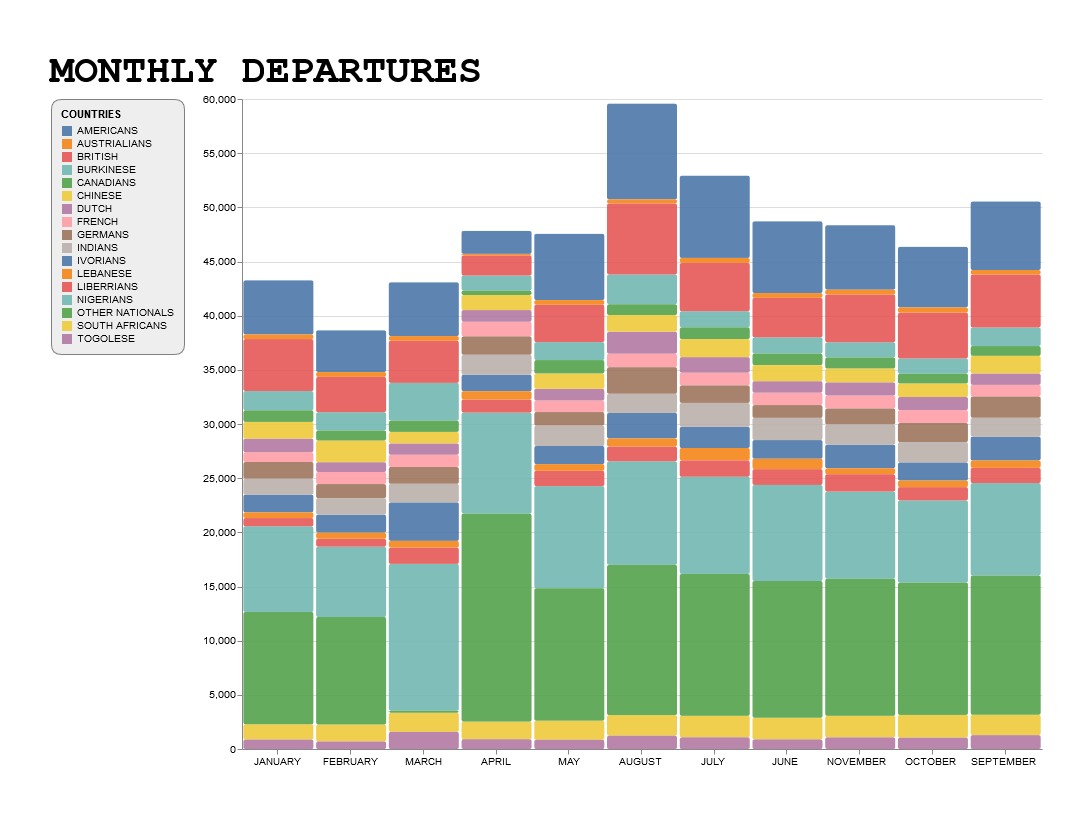

In [442]:
chart2= alt.Chart(trans).mark_bar(size=70,cornerRadius=1.9,font="Helvetica Neue",filled=True).encode(
    x=alt.X('MONTHS:O', 
            title='',
            sort=alt.EncodingSortField(field="Letters", op="count", order='ascending'),
            axis=alt.AxisConfig(labelAngle=360)),
    y=alt.Y('sum(DEPARTURES)', title=None, ),
    color=alt.Color('COUNTRIES', legend=alt.Legend(orient="left",type = 'symbol')),
    opacity=alt.OpacityValue(0.9),
    #size=alt.Size('MONTHS:N',scale=alt.Scale(range=[0,600])),
    tooltip=alt.Tooltip(['COUNTRIES','DEPARTURES','PERCENTAGE'])
).properties(
    width=800,
    padding=50,
    height=650,
    background='white',
    title=alt.TitleParams(text='MONTHLY DEPARTURES')
    ).configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    orient='top-left')
chart2.configure_title(
    fontSize=40,
    font='Courier',
    anchor='start',
    align='right',
    color='black',
    ).configure_view(
    stroke='transparent'
)

In [447]:
trans

,MONTHS,DEPARTURES,COUNTRIES,PERCENTAGE
0,JANUARY,1634,IVORIANS,3.78
1,JANUARY,1780,BURKINESE,4.11
2,JANUARY,7910,NIGERIANS,18.29
3,JANUARY,757,LIBERRIANS,1.75
4,JANUARY,1415,SOUTH AFRICANS,3.27
...,...,...,...,...
182,SEPTEMBER,1620,CHINESE,3.21
183,SEPTEMBER,1739,INDIANS,3.44
184,SEPTEMBER,681,LEBANESE,1.35
185,SEPTEMBER,419,AUSTRIALIANS,0.83


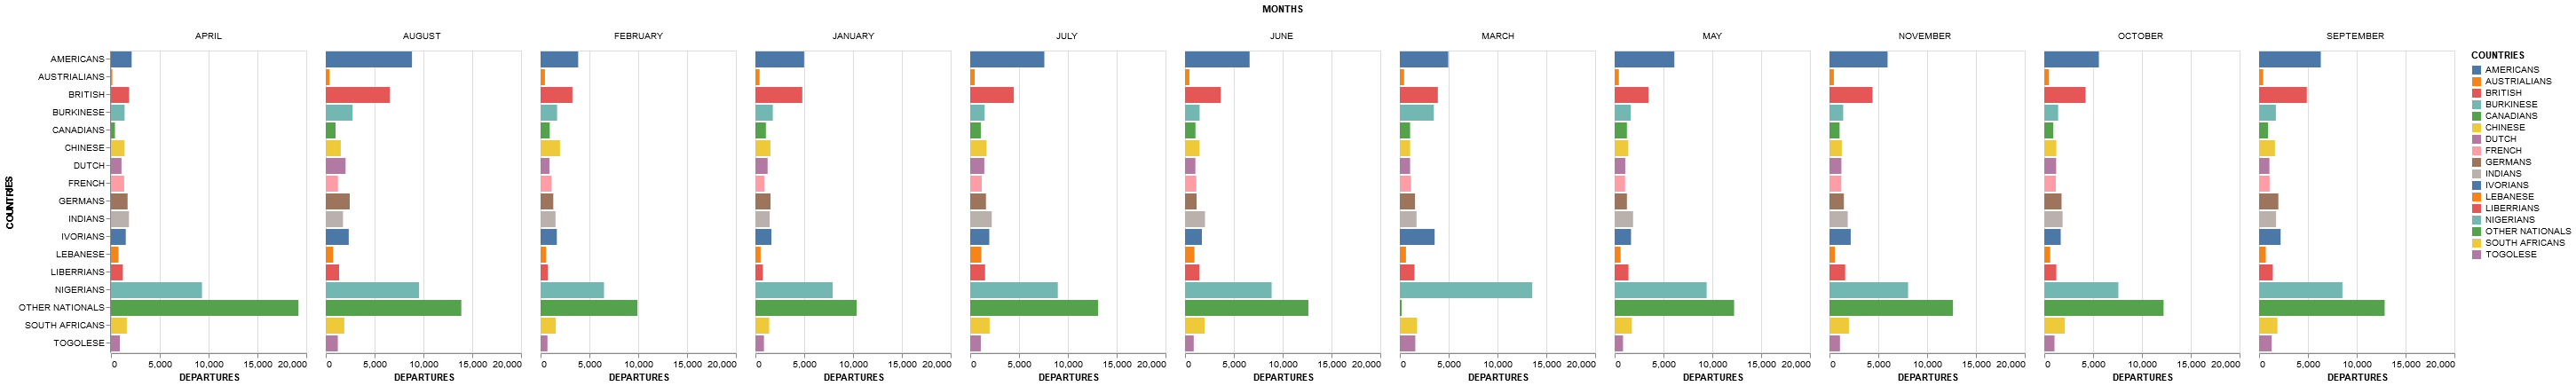

In [439]:
alt.Chart(trans).mark_bar().encode(
    column='MONTHS',
    x='DEPARTURES',
    y='COUNTRIES',
    color='COUNTRIES'
).properties(width=220)

In [247]:
print(source.head(3))
print('\n')
print(trans)

      yield    variety  year             site
0  27.00000  Manchuria  1931  University Farm
1  48.86667  Manchuria  1931           Waseca
2  27.43334  Manchuria  1931           Morris


         MONTHS  DEPARTURES        COUNTRIES
0       JANUARY        1634         IVORIANS
1       JANUARY        1780        BURKINESE
2       JANUARY        7910        NIGERIANS
3       JANUARY         757       LIBERRIANS
4       JANUARY        1415   SOUTH AFRICANS
..          ...         ...              ...
182  SEPTEMBER         1620          CHINESE
183  SEPTEMBER         1739          INDIANS
184  SEPTEMBER          681         LEBANESE
185  SEPTEMBER          419     AUSTRIALIANS
186  SEPTEMBER        12855  OTHER NATIONALS

[187 rows x 3 columns]


In [160]:
df1

,MONTHS,IVORIANS,BURKINESE,NIGERIANS,LIBERRIANS,SOUTH AFRICANS,TOGOLESE,FRENCH,GERMANS,DUTCH,BRITISH,AMERICANS,CANADIANS,CHINESE,INDIANS,LEBANESE,AUSTRIALIANS,OTHER NATIONALS
0,JANUARY DEPARTURE,1634,1780,7910,757,1415,873,905,1548,1250,4798,4987,1074,1539,1465,531,428,10364
1,FEBRUARY DEPARTURE,1662,1693,6490,734,1563,702,1117,1298,903,3257,3848,937,1987,1525,562,449,9920
2,MARCH DEPARTURE,3559,3482,13558,1498,1767,1581,1126,1555,1049,3888,4956,1048,1057,1710,622,435,185
3,APRIL DEPARTURE,1517,1394,9320,1215,1622,906,1350,1704,1079,1854,2118,408,1388,1839,766,139,19203
4,MAY DEPARTURE,1673,1653,9421,1414,1760,856,1064,1253,1083,3452,6113,1255,1397,1883,614,430,12232
5,JUNE DEPARTURE,1727,1494,8867,1459,1996,888,1145,1184,1062,3649,6614,1068,1479,2044,956,444,12628
6,JULY DEPARTURE,1954,1482,8969,1520,1984,1081,1177,1614,1440,4463,7590,1085,1666,2204,1137,456,13097
7,AUGUST DEPARTURE,2351,2750,9554,1368,1898,1230,1246,2454,2028,6556,8826,997,1540,1764,749,380,13876
8,SEPTEMBER DEPARTURE,2201,1714,8533,1402,1877,1285,1074,1968,1056,4887,6314,907,1620,1739,681,419,12855
9,OCTOBER DEPARTURE,1677,1416,7583,1230,2104,1045,1187,1763,1213,4226,5590,918,1232,1874,603,475,12216


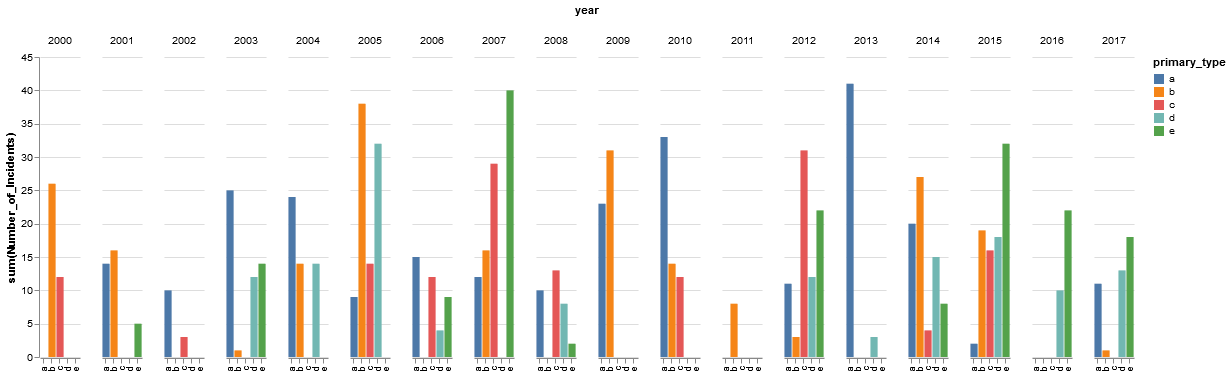

In [163]:
import altair as alt
import pandas as pd
import numpy as np

own = pd.DataFrame({
    'year': np.random.randint(2000, 2018, 100),
    'Number_of_Incidents': np.random.randint(0, 20, 100),
    'percent_arrest': np.random.rand(100),
    'primary_type': np.random.choice(['a', 'b', 'c', 'd', 'e'], 100)
})

alt.Chart(own).mark_bar().encode(
    x=alt.X('primary_type', scale=alt.Scale(rangeStep=8), title=None),
    y=alt.Y('sum(Number_of_Incidents)', title='sum(Number_of_Incidents)'),
    color='primary_type',
    column='year',
    tooltip=['year']
).configure_view(
    stroke='transparent'
)

In [173]:
print(own.head(2))
print('\n')
df.head(2)

   year  Number_of_Incidents  percent_arrest primary_type
0  2013                   19        0.539551            a
1  2002                   10        0.394771            a




,COUNTRIES,JANUARY DEPARTURE,FEBRUARY DEPARTURE,MARCH DEPARTURE,APRIL DEPARTURE,MAY DEPARTURE,JUNE DEPARTURE,JULY DEPARTURE,AUGUST DEPARTURE,SEPTEMBER DEPARTURE,OCTOBER DEPARTURE,NOVEMBER DEPARTURE
0,IVORIANS,1634,1662,3559,1517,1673,1727,1954,2351,2201,1677,2172
1,BURKINESE,1780,1693,3482,1394,1653,1494,1482,2750,1714,1416,1404


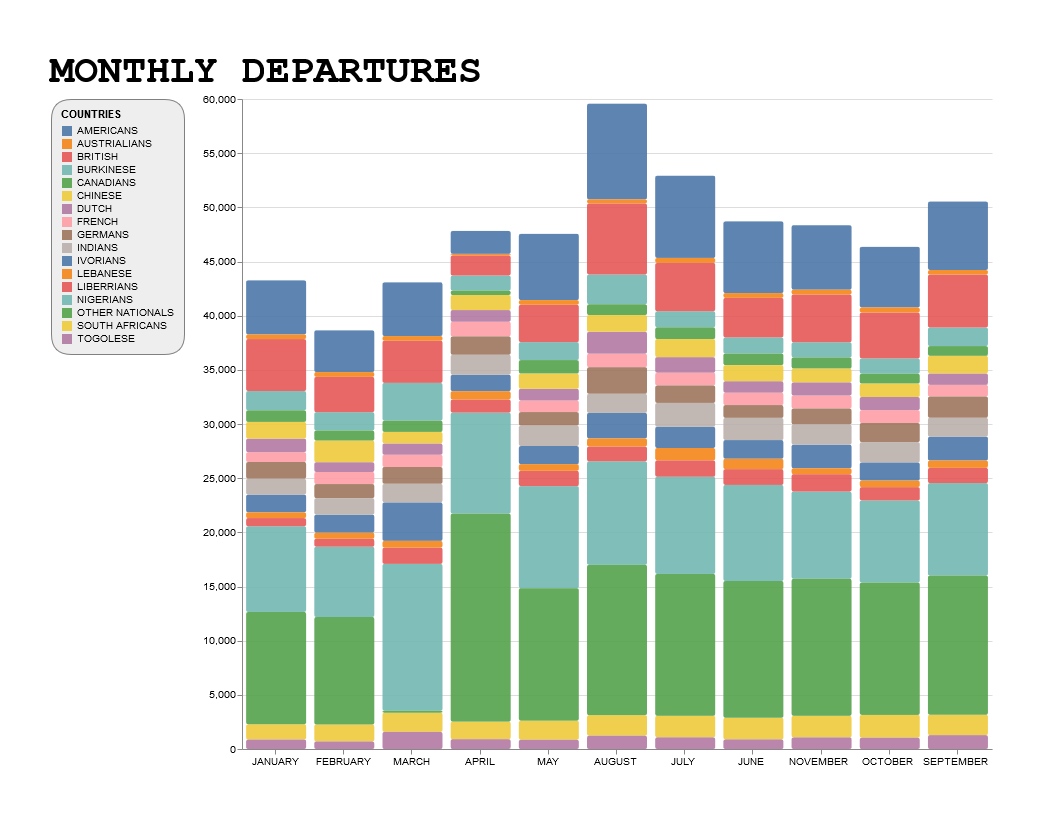

In [468]:
chart2= alt.Chart(trans).mark_bar(size=60,cornerRadius=1.9,font="Helvetica Neue",filled=True).encode(
    x=alt.X('MONTHS:O', 
            title='',
            sort=alt.EncodingSortField(field="Letters", op="count", order='ascending'),
            axis=alt.AxisConfig(labelAngle=360)),
    y=alt.Y('sum(DEPARTURES)', title=None, ),
    color=alt.Color('COUNTRIES',legend=alt.Legend(orient="left",type = 'symbol')),
    opacity=alt.OpacityValue(0.9),
    #size=alt.Size('MONTHS:N',scale=alt.Scale(range=[0,600])),
    tooltip=alt.Tooltip(['COUNTRIES','DEPARTURES','PERCENTAGE'])
).properties(
    width=750,
    padding=50,
    height=650,
    background='white',
    title=alt.TitleParams(text='MONTHLY DEPARTURES')
    ).configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=20,
    orient='top-left')
chart2.configure_title(
    fontSize=40,
    font='Courier',
    anchor='start',
    align='right',
    color='black',
    ).configure_view(
    stroke='transparent'
)